# Dutch primary school denomination classificator
 
## Overview

In the Netherland  children go to primary school on the next day after they turn 4 years old. And before that, when they are 2.5 or 3 year old, parents should choose a school for them. Ideally the best school for their baby. It's quite a big problem for non-native dutch parent, like me - I have no idea what is important,what should I think about, what should I look at in this process. For example, there are a lot of types of school, like 'Openbaar', 'Rooms-Katholiek', 'Protestants-Christelijk', etc. And for the person who never met this system before, it's not very clear which one should I choose and which one would fit my child. On the other hand, I want to make a desicion based on objective data like scores in final tests or how many pupils from the school were recommended to continue different 'level' of education in future, or for example 'quality' of students knowledge etc. 

So as a result of all this thoughts I realized that I have a problem: I don't understand, do I need to choose a type of school together with other characteristics, or it can be explained by this characteristics. Then I can just choose other characteristics that I want for my childs school to have and they will just define the best type of school. In other words, is it possible to make a classifier which would identify whether school is Openbaar or Rooms-Katholiek or has other denomination, based on other characterrictics we have? 
I found and pool in the dataset the most important information I want to know about my childs future school, so now I want to know do I need to choose a denomination of a school (and spend time to investigate what each school denomination mean in Dutch culture, their comparison and so on)? Or I can just choose other characteristic (which looks more clear to me) and they will define a denomination of a school. So I will build a few classifiers based on different ML alghorithms, will try to choose the best of them and see if the best classifier works good enough to predict a denomination of a primary school.

## Data preparation

Let's start with reading dataset from the file 'Score.csv':

In [61]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_score = pd.read_csv("Score.csv", error_bad_lines=False, sep=',', encoding = "ISO-8859-1") 
print(data_score.shape)
print(data_score.columns)
data_score.head() 

(31300, 37)
Index(['SCHOOL_ID', 'DATUM', 'INSTELLINGSNAAM_VESTIGING', 'POSTCODE_VESTIGING',
       'PLAATSNAAM', 'GEMEENTENUMMER', 'GEMEENTENAAM', 'PROVINCIE', 'SOORT_PO',
       'DENOMINATIE_VESTIGING', 'BEVOEGD_GEZAG_NUMMER',
       'AANTAL_LEERLINGEN_EXAMEN', 'EXAMEN', 'EXAMEN_AANTAL', 'EXAMEN_GEM',
       'REKENEN_LAGER1F', 'REKENEN_1F', 'REKENEN_1S', 'REKENEN_2F',
       'LV_LAGER1F', 'LV_1F', 'LV_2F', 'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO',
       'PRO', 'VMBO', 'VMBO_HAVO', 'HAVO', 'HAVO_VWO', 'VWO',
       'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES', 'LJ8', 'ZIT', 'ZITPERC'],
      dtype='object')


,SCHOOL_ID,DATUM,INSTELLINGSNAAM_VESTIGING,POSTCODE_VESTIGING,PLAATSNAAM,GEMEENTENUMMER,GEMEENTENAAM,PROVINCIE,SOORT_PO,DENOMINATIE_VESTIGING,...,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT,ZITPERC
0,000AP_2015,2015,De Schanskorf,2715BT,ZOETERMEER,637,Zoetermeer,Zuid-Holland,Bo,Gereformeerd vrijgemaakt,...,1,0,5,1,1,0,11,13,0,0.000000
1,000AR_2015,2015,"BS ""De Maasparel""",6109AM,OHE EN LAAK,1641,Maasgouw,Limburg,Bo,Rooms-Katholiek,...,1,0,7,0,6,0,18,17,0,0.000000
2,000AZ_2015,2015,De Kiezel en de Kei,2971AR,BLESKENSGRAAF CA,1927,Molenwaard,Zuid-Holland,Bo,Openbaar,...,3,5,3,2,4,0,22,19,3,15.789474
3,000BA_2015,2015,OBS De Klimboom,6666EB,HETEREN,1734,Overbetuwe,Gelderland,Bo,Openbaar,...,1,0,1,4,0,0,12,24,5,20.833333
4,000BB_2015,2015,Obs Letterwies,9944AR,NIEUWOLDA,1895,Oldambt,Groningen,Bo,Openbaar,...,7,0,5,0,2,0,16,15,2,13.333333


There are a lot of variables here which define address of the school in different ways, so we need to choose one of them. I think we can leave 'GEMEENTENUMMER' column as the variable which explains location  and remove the rest of the the address columns and also 'BEVOEGD_GEZAG_NUMMER':

In [62]:
columns = ['SCHOOL_ID', 'DATUM', 'INSTELLINGSNAAM_VESTIGING', 'POSTCODE_VESTIGING', 'PLAATSNAAM', 'GEMEENTENAAM', 
           'PROVINCIE', 'BEVOEGD_GEZAG_NUMMER', 'ZITPERC']
print(data_score.shape)
data_score.drop(columns, 1, inplace = True)
print(data_score.shape)
print(data_score.columns)
data_score.head()

(31300, 37)
(31300, 28)
Index(['GEMEENTENUMMER', 'SOORT_PO', 'DENOMINATIE_VESTIGING',
       'AANTAL_LEERLINGEN_EXAMEN', 'EXAMEN', 'EXAMEN_AANTAL', 'EXAMEN_GEM',
       'REKENEN_LAGER1F', 'REKENEN_1F', 'REKENEN_1S', 'REKENEN_2F',
       'LV_LAGER1F', 'LV_1F', 'LV_2F', 'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO',
       'PRO', 'VMBO', 'VMBO_HAVO', 'HAVO', 'HAVO_VWO', 'VWO',
       'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES', 'LJ8', 'ZIT'],
      dtype='object')


,GEMEENTENUMMER,SOORT_PO,DENOMINATIE_VESTIGING,AANTAL_LEERLINGEN_EXAMEN,EXAMEN,EXAMEN_AANTAL,EXAMEN_GEM,REKENEN_LAGER1F,REKENEN_1F,REKENEN_1S,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
0,637,Bo,Gereformeerd vrijgemaakt,11,CET,11,534.3,0,0,0,...,0,1,0,5,1,1,0,11,13,0
1,1641,Bo,Rooms-Katholiek,18,CET,18,539.8,0,0,0,...,0,1,0,7,0,6,0,18,17,0
2,1927,Bo,Openbaar,24,CET,22,532.9,0,0,0,...,1,3,5,3,2,4,0,22,19,3
3,1734,Bo,Openbaar,11,CET,11,536.2,0,0,0,...,1,1,0,1,4,0,0,12,24,5
4,1895,Bo,Openbaar,16,CET,16,531.3,0,0,0,...,0,7,0,5,0,2,0,16,15,2


Next I would like to explore the outcome:

Openbaar                          9951
Rooms-Katholiek                   9588
Protestants-Christelijk           7899
Algemeen bijzonder                1513
Reformatorisch                     806
Gereformeerd vrijgemaakt           534
Antroposofisch                     328
Samenwerking PC, RK                265
Islamitisch                        235
Interconfessioneel                  60
Evangelisch                         41
Hindoeistisch                       32
Samenwerking Opb., RK               15
Samenwerking Opb., PC               15
Joods                               10
Evangelische broedergemeenscha       4
Samenwerking PC, RK, Alg. Bijz       4
Name: DENOMINATIE_VESTIGING, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


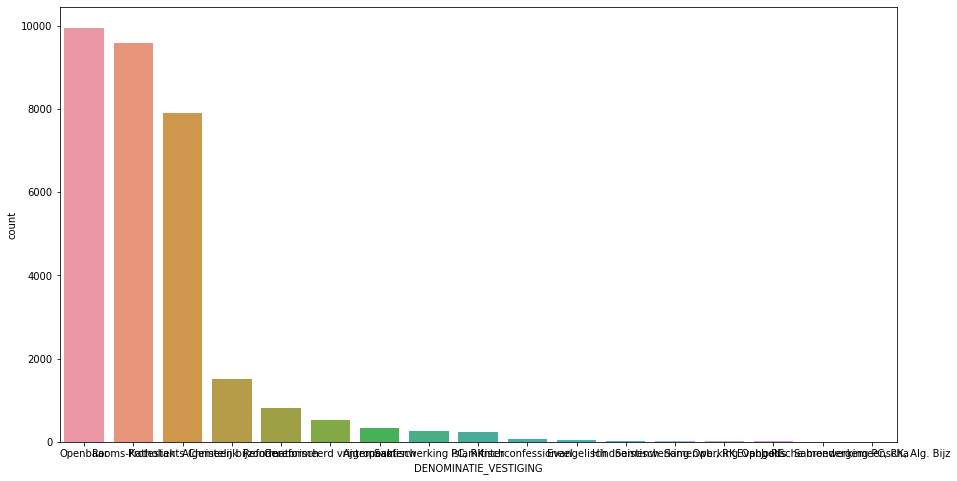

In [63]:
print(data_score['DENOMINATIE_VESTIGING'].value_counts())
plt.figure(figsize=(15,8))
print(sns.countplot(x='DENOMINATIE_VESTIGING',data=data_score, 
                    order = data_score['DENOMINATIE_VESTIGING'].value_counts().index))

In the dataset we got there are 3 categorical columns. Before start modelling, we need to convert all the categorical variables to numerical ones. Let's use ***LabelEncoder*** this time: 

In [64]:
from sklearn.preprocessing import LabelEncoder

data_score['SOORT_PO'] = LabelEncoder().fit_transform(data_score['SOORT_PO'])

data_score['DENOMINATIE_VESTIGING'] = LabelEncoder().fit_transform(data_score['DENOMINATIE_VESTIGING'])

data_score['EXAMEN'] = LabelEncoder().fit_transform(data_score['EXAMEN'])
data_score.head()

,GEMEENTENUMMER,SOORT_PO,DENOMINATIE_VESTIGING,AANTAL_LEERLINGEN_EXAMEN,EXAMEN,EXAMEN_AANTAL,EXAMEN_GEM,REKENEN_LAGER1F,REKENEN_1F,REKENEN_1S,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
0,637,0,4,11,2,11,534.3,0,0,0,...,0,1,0,5,1,1,0,11,13,0
1,1641,0,12,18,2,18,539.8,0,0,0,...,0,1,0,7,0,6,0,18,17,0
2,1927,0,9,24,2,22,532.9,0,0,0,...,1,3,5,3,2,4,0,22,19,3
3,1734,0,9,11,2,11,536.2,0,0,0,...,1,1,0,1,4,0,0,12,24,5
4,1895,0,9,16,2,16,531.3,0,0,0,...,0,7,0,5,0,2,0,16,15,2


## Building classification models

Ley's try to build classification models using a few different ML alghorithms: Random Forest, SVM, KNN, XGBoosting. 

First of all, we need to split data to test and train subsets:

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import roc_curve

pred = data_score['DENOMINATIE_VESTIGING']

data_score.drop('DENOMINATIE_VESTIGING', 1, inplace = True)

random_state = 4004

scaler = MinMaxScaler()
data_score = scaler.fit_transform(data_score)
    
X_train, X_test, y_train, y_test = train_test_split(data_score, pred, train_size=0.7, test_size=0.3, random_state=random_state)

### Random forest

In [66]:
rfc = RandomForestClassifier(n_estimators=100, random_state = random_state)
rfc.fit(X_train, y_train)
pred_test = rfc.predict(X_test)


In [67]:
rfc_score = 100 * rfc.score(X_test, y_test)
print("Random Forest's accuracy is: %3.2f" % (rfc_score))

Random Forest's accuracy is: 46.40


### K Nearest Neighbors 

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
pred_test = knn.predict(X_test)

In [69]:
knn_score = 100 * knn.score(X_test, y_test)
print("KNN's accuracy is: %3.2f" % (knn_score))

KNN's accuracy is: 39.04


### XGBoost

In [70]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
pred_test = xgb.predict(X_test)

In [71]:
xgb_score = (pred_test == y_test).sum() / len(pred_test)*100
print("XGBoost's prediction accuracy is: %3.2f" % (xgb_score))

XGBoost's prediction accuracy is: 53.51


In [72]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'SVC', 'Naive Bayes', 'XGBoost'],
    'Score': [rfc_score, knn_score, svc_score, gnb_score, xgb_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
XGBoost,53.514377
Random Forest,46.400426
SVC,40.809372
KNN,39.041534
Naive Bayes,7.742279


We can see that none of the ML algorithm was able to build apropriate model, the best one shows accuracy =  53% which is almost the same as random classifier. It means that we can say anything about denomination of the school looking at this features, so it looks like I can't just choose this school parameters and don't think about denomination, to find the best school for my toddler, I also need to choose denomination.